I had no input here, just used the "Blob detection" skimage tutorial from:
http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html#sphx-glr-download-auto-examples-features-detection-plot-blob-py



In [45]:
%matplotlib inline
import pandas as pd
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


In [10]:
# Load dataframe from pickled pandas object
df_pos= pd.read_pickle("./position.pkl")
df_fir= pd.read_pickle("./spatial_firing.pkl")


In [39]:
df_fir.columns

Index(['session_id', 'cluster_id', 'tetrode', 'primary_channel',
       'firing_times', 'firing_times_opto', 'number_of_spikes',
       'mean_firing_rate', 'isolation', 'noise_overlap', 'peak_snr',
       'peak_amp', 'random_snippets', 'position_x', 'position_x_pixels',
       'position_y', 'position_y_pixels', 'hd', 'speed', 'hd_spike_histogram',
       'max_firing_rate_hd', 'preferred_HD', 'hd_score', 'firing_maps',
       'max_firing_rate', 'firing_fields', 'field_max_firing_rate',
       'firing_fields_hd_session', 'firing_fields_hd_cluster',
       'field_hd_max_rate', 'field_preferred_hd', 'field_hd_score',
       'number_of_spikes_in_fields', 'time_spent_in_fields_sampling_points',
       'spike_times_in_fields', 'times_in_session_fields'],
      dtype='object')

(8257,)

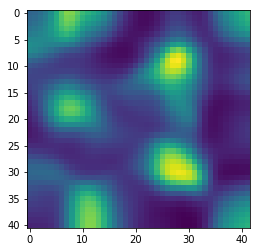

In [37]:
plt.imshow(df_fir.firing_maps[4])

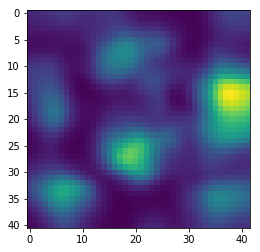

In [38]:
plt.imshow(df_fir.firing_maps[9])

In [55]:
#Only change is here, because the tutorial uses RGB images and perform a conversion.
image_gray = df_fir.firing_maps[4]
image = df_fir.firing_maps[4]

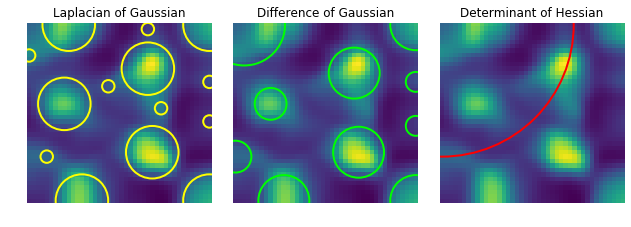

In [53]:
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

As you can see LoG and DoG works pretty well just with the default values. Obviously play around with different values to see how well it works. I also wonder if you have experimented with using a median filter in the pre-processing step? That might get rid of those small "false" blobs being detected.